In [41]:
import numpy as np
import pandas as pd

In [42]:
import sys
sys.path.append('../')
import consts
import util

In [43]:
data = pd.read_csv('../data/strawberry_samples_big.csv', index_col=0)
val_data = pd.read_csv('../data/strawberry_val_dataset.csv', index_col=0)
data

,OVERALL LIKING,TEXTURE LIKING,SWEETNESS INTENSITY,SOURNESS INTENSITY,STRAWBERRY FLAVOR INTENSITY,6915-15-7,77-92-9,50-99-7,57-48-7,57-50-1,...,7786-58-5,15111-96-3,706-14-9,10522-34-6,5881-17-4,128-37-0,40716-66-3,4887-30-3,5454-09-1,2305-05-7
0,0.307068,0.250174,0.276647,0.146214,0.305021,-2.120421,0.171179,0.759180,0.612070,0.314374,...,-0.271610,-0.443110,-0.544167,-0.463164,1.289539,-0.945803,0.122098,-0.127048,0.804970,-0.354773
1,0.307859,0.249023,0.276101,0.147151,0.306364,-2.119978,0.171282,0.759195,0.612046,0.314378,...,-0.276743,-0.334642,-0.545464,-0.568225,1.346308,-0.893509,0.117186,-0.129998,0.800679,-0.374048
2,0.306348,0.248756,0.277115,0.146568,0.306719,-2.120063,0.171283,0.759176,0.612056,0.314430,...,-0.275587,-0.241669,-0.544872,-0.614111,1.283168,-0.997929,0.118824,-0.128236,0.819822,-0.357370
3,0.307694,0.248227,0.277607,0.147135,0.305276,-2.120058,0.171249,0.759163,0.612060,0.314365,...,-0.273644,-0.312912,-0.545357,-0.562826,1.343249,-0.959232,0.118201,-0.126724,0.811123,-0.377366
4,0.308055,0.249070,0.276638,0.145692,0.305707,-2.120678,0.171089,0.759154,0.612069,0.314420,...,-0.273092,-0.211367,-0.545153,-0.589017,1.548846,-0.901830,0.120083,-0.126749,0.807910,-0.384669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,0.237395,0.249785,0.205025,0.225081,0.258800,-0.222374,0.884429,-0.834332,-0.803436,-0.625512,...,-0.368228,-0.326611,-0.146165,-0.098112,0.032811,-0.408101,0.055410,-0.453151,-0.452553,-0.445544
53996,0.240068,0.250256,0.204477,0.226804,0.257519,-0.221809,0.884286,-0.834295,-0.803437,-0.625499,...,-0.394705,-0.280702,-0.155369,-0.551456,-0.262542,-0.313059,0.052135,-0.480896,-0.518157,-0.462789
53997,0.238440,0.249851,0.204574,0.224211,0.257632,-0.222039,0.884583,-0.834322,-0.803455,-0.625512,...,-0.390017,-0.316657,-0.159865,-0.542431,-0.189396,-0.153318,0.055373,-0.470802,-0.472719,-0.478549
53998,0.238959,0.250376,0.202495,0.225202,0.258081,-0.222588,0.884425,-0.834312,-0.803431,-0.625546,...,-0.372647,-0.229130,-0.157428,-0.625398,-0.242219,-0.471044,0.053125,-0.445828,-0.497520,-0.467094


In [44]:
# target_cols = data.columns[:5]
target_cols = data.columns[[0]]
target_cols

Index(['OVERALL LIKING'], dtype='object')

In [45]:
feature_cols = data.columns[5:]
feature_cols

Index(['6915-15-7', '77-92-9', '50-99-7', '57-48-7', '57-50-1', 'SSC', 'pH',
       'TA', '75-85-4 ', '616-25-1 ', '1629-58-9 ', '96-22-0 ', '110-62-3 ',
       '1534-08-3 ', '105-37-3', '109-60-4 ', '623-42-7 ', '591-78-6 ',
       '108-10-1 ', '1576-87-0 ', '1576-86-9 ', '623-43-8 ', '71-41-0',
       '1576-95-0 ', '556-24-1 ', '589-38-8 ', '105-54-4 ', '66-25-1 ',
       '123-86-4 ', '624-24-8 ', '29674-47-3 ', '96-04-8 ', '638-11-9 ',
       '116-53-0 ', '7452-79-1 ', '6728-26-3 ', '928-95-0 ', '111-27-3 ',
       '123-92-2 ', '624-41-9 ', '110-43-0', '2432-51-1 ', '105-66-8 ',
       '539-82-2 ', '111-71-7 ', '628-63-7 ', '1191-16-8 ', '106-70-7 ',
       '55514-48-2 ', '110-93-0 ', '109-21-7 ', '123-66-0 ', '124-13-0 ',
       '142-92-7 ', '2497-18-9 ', '60415-61-4', '104-76-7 ', ' 2311-46-8 ',
       '109-19-3 ', '2548-87-0 ', '540-18-1 ', '4077-47-8 ', '20664-46-4',
       '821-55-6 ', '5989-33-3 ', '78-70-6 ', '124-19-6 ', '103-09-3',
       '140-11-4 ', '2639-63-6 ', '53398-8

In [46]:
features = data[feature_cols].values
labels = data[target_cols].values
val_features = val_data[feature_cols].values
val_labels = val_data[target_cols].values
print(features.shape)
print(labels.shape)

(54000, 89)
(54000, 1)


In [47]:
NUM_SAMPLE_TYPES = 54
NUM_SAMPLES_PER_TYPE = len(data) // NUM_SAMPLE_TYPES
TEST_SIZE = 0.3
train_X = features[int(NUM_SAMPLE_TYPES*TEST_SIZE)*NUM_SAMPLES_PER_TYPE:]
train_y = labels[int(NUM_SAMPLE_TYPES*TEST_SIZE)*NUM_SAMPLES_PER_TYPE:]
val_X = val_features[:int(NUM_SAMPLE_TYPES*TEST_SIZE)]
val_y = val_labels[:int(NUM_SAMPLE_TYPES*TEST_SIZE)]

train_X.shape, train_y.shape, val_X.shape, val_y.shape

((38000, 89), (38000, 1), (16, 89), (16, 1))

In [48]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

from hypll import nn as hnn
from hypll.tensors import TangentTensor

# Define your MLP model
class MLP(nn.Module):
    def __init__(self, input_size, output_size, layer_size, num_hidden_layers, manifold):
        super(MLP, self).__init__()
        torch.manual_seed(consts.TORCH_MANUAL_SEED)
        self.fc_in = hnn.HLinear(input_size, layer_size, manifold=manifold)
        self.relu = hnn.HReLU(manifold=manifold)
        self.hidden_fcs = nn.ModuleList([hnn.HLinear(layer_size, layer_size, manifold=manifold) for _ in range(num_hidden_layers)])
        self.fc_out = hnn.HLinear(layer_size, output_size, manifold=manifold)

    def forward(self, x):
        x = self.fc_in(x)
        x = self.relu(x)
        for fc in self.hidden_fcs:
            x = fc(x)
            x = self.relu(x)
        x = self.fc_out(x)

        return x

# Define custom PyTorch dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define training function
def train_model(model, train_loader, criterion, optimizer, manifold, device):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        tangents = TangentTensor(data=inputs, man_dim=-1, manifold=manifold)
        manifold_inputs = manifold.expmap(tangents)

        outputs = model(manifold_inputs)

        loss = criterion(outputs.tensor, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    return running_loss / len(train_loader.dataset)


def do_prediction(model, inputs, manifold, device):
    inputs = inputs.float().to(device)
    tangents = TangentTensor(data=inputs.to(device), man_dim=-1, manifold=manifold)
    manifold_inputs = manifold.expmap(tangents)

    outputs = model(manifold_inputs)

    return outputs

In [58]:
num_hidden_layers = 16
layer_size = 72
lr = 0.02
weight_decay = 0.001
batch_size = 1024
epochs = 45
curvature  = -1

In [59]:
from hypll.optim import RiemannianAdam
from hypll.manifolds.poincare_ball import Curvature, PoincareBall
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

manifold = PoincareBall(c=Curvature(curvature))

# Create DataLoader for training and validation
train_dataset = CustomDataset(train_X, train_y)
val_dataset = CustomDataset(val_X, val_y)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize model, criterion, and optimizer
model = MLP(input_size=len(feature_cols), output_size=len(target_cols), layer_size=layer_size, num_hidden_layers=num_hidden_layers, manifold=manifold).to(device)

criterion = nn.MSELoss()

optimizer = RiemannianAdam(model.parameters(), lr=lr, weight_decay=weight_decay)

eval_stats = {'loss': {'train': [], 'val': []}, 'mae': {'train': [], 'val': []}}

for epoch in tqdm(range(epochs), desc="Epoch"):
    eval_stats['loss']['train'].append(train_model(model, train_loader, criterion, optimizer, manifold, device))
    eval_stats['loss']['val'].append(util.h_evaluate_loss(model, val_loader, criterion, manifold, device))

    eval_stats['mae']['train'].append(util.h_evaluate_mae(model, train_loader, manifold, device))
    eval_stats['mae']['val'].append(util.h_evaluate_mae(model, val_loader, manifold, device))

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {eval_stats['loss']['train'][-1]:.4f}, Val Loss: {eval_stats['loss']['val'][-1]:.4f}")


Epoch:   0%|          | 0/45 [00:00<?, ?it/s]

Epoch 1/45, Train Loss: 0.2015, Val Loss: 0.0024
Epoch 2/45, Train Loss: 0.0014, Val Loss: 0.0030
Epoch 3/45, Train Loss: 0.0010, Val Loss: 0.0031
Epoch 4/45, Train Loss: 0.0006, Val Loss: 0.0030
Epoch 5/45, Train Loss: 0.0004, Val Loss: 0.0032
Epoch 6/45, Train Loss: 0.0002, Val Loss: 0.0031
Epoch 7/45, Train Loss: 0.0001, Val Loss: 0.0035
Epoch 8/45, Train Loss: 0.0001, Val Loss: 0.0040
Epoch 9/45, Train Loss: 0.0000, Val Loss: 0.0043
Epoch 10/45, Train Loss: 0.0000, Val Loss: 0.0045
Epoch 11/45, Train Loss: 0.0000, Val Loss: 0.0046
Epoch 12/45, Train Loss: 0.0000, Val Loss: 0.0043
Epoch 13/45, Train Loss: 0.0000, Val Loss: 0.0043
Epoch 14/45, Train Loss: 0.0000, Val Loss: 0.0041
Epoch 15/45, Train Loss: 0.0000, Val Loss: 0.0039
Epoch 16/45, Train Loss: 0.0000, Val Loss: 0.0037
Epoch 17/45, Train Loss: 0.0000, Val Loss: 0.0036
Epoch 18/45, Train Loss: 0.0000, Val Loss: 0.0034
Epoch 19/45, Train Loss: 0.0000, Val Loss: 0.0033
Epoch 20/45, Train Loss: 0.0000, Val Loss: 0.0031
Epoch 21/

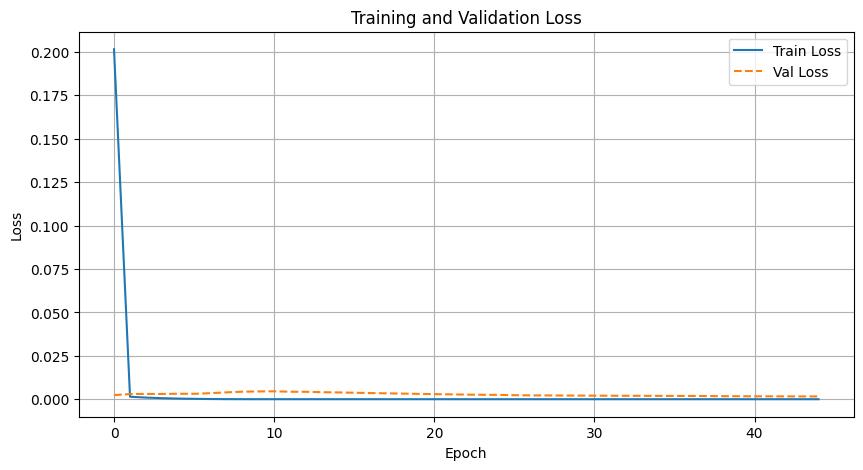

In [60]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), eval_stats['loss']['train'], label=f'Train Loss')
plt.plot(range(epochs), eval_stats['loss']['val'], label=f'Val Loss', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
# plt.yscale('log')
plt.show()

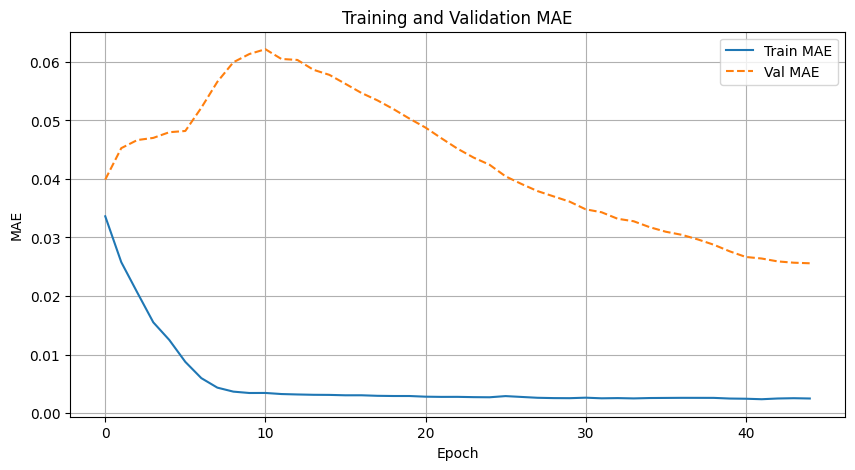

In [61]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), eval_stats['mae']['train'], label=f'Train MAE')
plt.plot(range(epochs), eval_stats['mae']['val'], label=f'Val MAE', linestyle='--')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
# plt.yscale('log')
plt.show()

In [62]:
preds = do_prediction(model, torch.tensor(val_X), manifold, device)
preds = preds.tensor.cpu().detach().numpy()
preds

array([[0.27804095],
       [0.26746047],
       [0.28564236],
       [0.29354116],
       [0.27988625],
       [0.27903014],
       [0.27773404],
       [0.30969757],
       [0.29117048],
       [0.28609064],
       [0.20666277],
       [0.15049346],
       [0.23705116],
       [0.17854714],
       [0.25165954],
       [0.20737885]], dtype=float32)

In [63]:
val_y

array([[0.3075],
       [0.2634],
       [0.361 ],
       [0.2249],
       [0.282 ],
       [0.3185],
       [0.2776],
       [0.3108],
       [0.2877],
       [0.2605],
       [0.213 ],
       [0.1406],
       [0.2031],
       [0.2842],
       [0.2499],
       [0.2098]])

In [67]:
preds - val_y

array([[-0.02945905],
       [ 0.00406047],
       [-0.07535764],
       [ 0.06864116],
       [-0.00211375],
       [-0.03946986],
       [ 0.00013404],
       [-0.00110243],
       [ 0.00347048],
       [ 0.02559064],
       [-0.00633723],
       [ 0.00989346],
       [ 0.03395116],
       [-0.10565286],
       [ 0.00175954],
       [-0.00242115]])

In [64]:
eval_stats['mae']['val']

[0.039893217,
 0.045261204,
 0.046643198,
 0.047013022,
 0.04798375,
 0.048195466,
 0.052165434,
 0.05659136,
 0.059939243,
 0.061344575,
 0.062165182,
 0.060500823,
 0.060331866,
 0.05865429,
 0.057781037,
 0.0562494,
 0.05469109,
 0.053422727,
 0.051932655,
 0.050303705,
 0.048776366,
 0.04693647,
 0.045166966,
 0.04365385,
 0.04242498,
 0.040443297,
 0.039131913,
 0.037921216,
 0.037017576,
 0.036119983,
 0.03481228,
 0.034302056,
 0.03319326,
 0.032768987,
 0.031756595,
 0.03098163,
 0.030452278,
 0.02967081,
 0.028758738,
 0.027627075,
 0.026668886,
 0.02639822,
 0.025906585,
 0.025685806,
 0.025588421]

num_hidden_layers = 10
layer_size = 512
lr = 0.001
weight_decay = 0.005
batch_size = 64
epochs = 5
curvature  = -1

0.035376877

In [65]:
np.abs((preds * 100) - (val_y * 100)).mean()

2.558843324184418